# Python And Data Analysis Project
Day 10 of Xccelerate Full-time Data Science Cohort 03  
Date: 29th Oct 2018

Presentated in class on Day 14: 2nd Nov 2018

The Markdown version is created using:
```
jupyter nbconvert 02-crossfit-best-affliate-topublish.ipynb --to markdown --output=cf18_which_gym_to_join.md
```

## What is the Crossfit Open?

Or just simply what is Crossfit???

[![Youtube link to 'Story of the Open'](https://img.youtube.com/vi/skUxFsTzZ4Q/0.jpg)](https://www.youtube.com/watch?v=skUxFsTzZ4Q)


## 1. Define the Business Need
People from around the world enters their scores into [Games.Crossfit.com](https://games.crossfit.com/) and there's already some filtering functions offered in the [leaderboard](https://games.crossfit.com/leaderboard/onlinequalifiers/2018) for people to interact with the data.

_**Aside from finding the world's best athletes or creating bragging rights, how can we use the data to create value for the community???**_

To those new to crossfit, **Could we use the data to determine which gym to join?**

>the three most important and interdependent facets of any fitness program, can be supported only by measurable, observable, repeatable facts, i.e., data.
>
> Greg Glassman

With Coach Glassman's quote in mind, we can all agree that the ultimate objective of the sport is if can we improve our measurable performance? For that the open is the ultimate performance test that's hosted by HQ once a year.

>The magic is in the movement, the art is in the programming, the science is in the explanation, and the fun is in the community
>
>Greg Glassman

And if you have been doing Crossfit for a while, you'd ultimately know that performance aside, the reason that keeps you coming back is the community! Having coached for the last three years at [Asphodel](https://crossfitasphodel.com), it is my opinion that one objective way to measure the health of an affiliate is it's members participation in the Open. Members who participate in the open tend to be those who come consistently (i.e. active in the community) and those who support and cheer on other members (i.e. contribute positively to the community).

Therefore, with the Open data from 2018 and 2017, we want to find which affliate serves its member in the best way. One indication of a great affliate is the community. Another is the quality of coaching. So in short we want to answer two questions:  

**1. For a given `Region` which affliate improved its members' participation the most, from 2017 to 2018?**  

**2. For a given `Region` which affliate's athlete performance improved the most from 2017 to 2018?**


## 2. Explore the Data

>If I have seen further it is only by standing on the shoulders of giants.
>
>Sir Isaac Newton

Over the years, [the leaderboard site](https://games.crossfit.com/leaderboard/onlinequalifiers/) actually has gone thru a few changes. It's not the most straight forward to scrape and there's no public API available.  

Luckily, Jean-Michel Daignan wrote a [great piece](http://jmdaignan.com/2018/03/30/crossfitopen/) on how to scrape the Crossfit Game website as of 2018 and even made the tool available on [github](https://github.com/jeanmidevacc/crossfit_webscraping). In short, he made use of a hidden API. [Click here](https://ianlondon.github.io/blog/web-scraping-discovering-hidden-apis/) if you wish to learn how to do that with other sites.

[Ray Bell](https://github.com/raybellwaves/cfanalytics) actually did the heavy lifting and made the Crossfit Open 2018 and 2017 dataset available on [Github](https://github.com/raybellwaves/cfanalytics/tree/master/Data). 

### Side Notes:
* Sam Swift is the real OG in this and was one of the first to work with [open data](http://swift.pw/crossfit-games-data-2012-2015/)
* Jonathan Kinnick from BTWB wrote [a great piece](https://btwb.blog/2018/02/24/crossfit-open-18-1-preliminary-analysis/) as well analyzing athlete's performance.

### Data Retrieval:
Let the fun begin, we are gonna use `pandas` to manage the data and `seaborn` + `matplotlib` for visualize


In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

sns.set(color_codes=True) #overide maplot libs ugly colours.
mpl.rcParams['figure.figsize'] = [13, 8] #default figure size

Let's define the data links.

In [2]:
url_head = 'https://raw.githubusercontent.com/raybellwaves/cfanalytics/master/Data/'

l_18url = [
    url_head + 'Women_Rx_2018.csv',
    url_head + 'Men_Rx_2018.csv'
]

l_17url = [
    url_head + 'Women_Rx_2017.csv',
    url_head + 'Men_Rx_2017.csv'
]

gyms_url = url_head + 'Affiliate_list.csv'

**Let's download the data. This might take a while**

In [3]:
l_d17 = [pd.read_csv(iurl) for iurl in l_17url]
l_d18 = [pd.read_csv(iurl) for iurl in l_18url]
dgyms = pd.read_csv(gyms_url)

/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2850: DtypeWarning: Columns (13,20) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2850: DtypeWarning: Columns (16,18,29) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2850: DtypeWarning: Columns (24,29) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


### How many people completed in 2017 and 2018?

In [7]:
print(f'# of Open Athletes \n2017: {"{:,}".format(len(l_d17[0]) + len(l_d17[1]))} \n2018: {"{:,}".format(len(l_d18[0]) + len(l_d18[1]))}')

# of Open Athletes 
2017: 273,670 
2018: 303,956


#### We need to apply some basic data cleaning:
* 2017 and 2018 data column names are different, so we need to rename them

In [8]:
col_map = {'Userid':'User_id', 
           'Height (m)': 'Height_(m)', 
           'Weight (kg)':'Weight_(kg)',
           'Regionid':'Region_id',
           'Regionname':'Region_name',
           'Affiliateid':'Affiliate_id',
           'Overallrank':'Overall_rank'}
l_d17 = [d.rename(columns = col_map) for d in l_d17]

* In the data frame that we want, we just want to have **region data**, **Overall_rank**, and a new column for **sex**

In [10]:
def JoinAllAthletes( df_ladies, df_men):
    l_columns = ['User_id', 'Name', 'Height_(m)', 'Weight_(kg)','Age',
                 'Region_id','Region_name','Affiliate_id','Overall_rank']
    dfl = df_ladies.loc[:, l_columns].set_index('User_id')
    dfm = df_men.loc[:, l_columns].set_index('User_id')
    dfl['Sex'] = 'F'
    dfm['Sex'] = 'M'
    
    return pd.concat([dfl, dfm])

df_18 = JoinAllAthletes( l_d18[0], l_d18[1])
df_17 = JoinAllAthletes( l_d17[0], l_d17[1])

* we also want to remove missing data

In [11]:
from functools import reduce

def GetMissing(in_df):
    missing_filter = [in_df.Overall_rank.isna(),
                     in_df.Affiliate_id.isna(),
                     in_df.Affiliate_id == 0,
                     in_df.Region_id.isna(),
                     in_df.Region_id ==0]
    
    dfilter = reduce( lambda x, y : x | y, missing_filter)
    return dfilter

df18 = df_18[~(GetMissing(df_18))] # '~' is for filter negation
df17 = df_17[~(GetMissing(df_17))]

print(f'For 2018: {len(df_18)} total athletes, {len(df18)} athletes have the crucial data. That is {"{:.2%}".format(len(df18)/ len(df_18))}\n')
print(f'For 2017: {len(df_17)} total athletes, {len(df17)} athletes have the crucial data. That is {"{:.2%}".format(len(df17)/ len(df_17))}')

For 2018: 303956 total athletes, 287564 athletes have the crucial data. That is 94.61%

For 2017: 273670 total athletes, 261126 athletes have the crucial data. That is 95.42%


## 3. Analyse the Data

Since the data set is pretty big, we are going to select a `Region` or maybe even a city first for speed of computation

### Question I: For the `Asia/Hong Kong`, which affiliate has the best Open participation?

To do that we need to combine the 2017 and 2018 data frame as well as getting affiliate information from the `dgyms` dataframe.  

* Let's create two new dataframes for the 2017 and 2018 data by `Affiliate_id` and filter only for `Region_name== "Asia"`

In [118]:
df18_ = df18[df18.Region_name=='Asia'].groupby('Affiliate_id')['Name'].agg({'Athlete_count_2018': 'count'})
df17_ = df17[df17.Region_name=='Asia'].groupby('Affiliate_id')['Name'].agg({'Athlete_count': 'count'})


/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.
/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


* We are going to store the 2017 athletes count number in the 2018 dataframe

In [15]:
def GetACount(in_df, a_id):
    nfilter = in_df.index == a_id
    if sum( nfilter ) == 0:
        return np.nan
    else:
        return int(in_df[ nfilter ]['Athlete_count'].values)
df18_['Athlete_count_2017'] = df18_.index.map(lambda x: GetACount(df17_, x))
df18_['change'] = df18_['Athlete_count_2018'] - df18_['Athlete_count_2017']
df18_['pct_change'] = df18_['Athlete_count_2018'] / df18_['Athlete_count_2017'] -1

* And let's fill in the affiliates data as well. The `GetAffiliateDet()` function will be useful again later.

In [18]:
def GetAffiliateDet( a_id, colname):
    dfilter = dgyms.Affiliate_id == a_id
    if sum(dfilter) == 0:
        return np.nan
    else:
        return dgyms[dfilter][colname].values[0]

df18_['Affiliate_name'] = df18_.index.map(lambda x: GetAffiliateDet(x, 'Affiliate_name'))
df18_['Country'] = df18_.index.map(lambda x: GetAffiliateDet(x, 'Country'))

#### The Top 10 `Asia` Affiliates by Open Participation are:

In [22]:
l_display_a_col = ['Affiliate_name','Country','Athlete_count_2018', 'Athlete_count_2017']
df18_.sort_values(by= 'Athlete_count_2018', ascending=False).head(10).loc[: , l_display_a_col]

,Affiliate_name,Country,Athlete_count_2018,Athlete_count_2017
Affiliate_id,,,,
1971,CrossFit Gangnam,"Korea, Republic of",192,138.0
10506,CrossFit Apgujeong,"Korea, Republic of",120,100.0
12640,CrossFit Redyar,Russian Federation,82,113.0
4574,CrossFit EKB,Russian Federation,80,81.0
13557,CrossFit 6221,Indonesia,78,37.0
9402,East West CrossFit,Thailand,73,59.0
5724,Reebok CrossFit MeWellness,China,72,59.0
6582,CrossFit Teddygym,"Korea, Republic of",67,82.0
5827,CrossFit Gof Metgot,Guam,66,56.0


#### The Top 10 `Asia` Affiliates by INCREASE in Open Participation:

In [25]:
l_display_a_col = ['Affiliate_name','Country','Athlete_count_2018', 'Athlete_count_2017','change','pct_change']
df18_.sort_values(by= 'change', ascending=False).head(10).loc[:,l_display_a_col]

,Affiliate_name,Country,Athlete_count_2018,Athlete_count_2017,change,pct_change
Affiliate_id,,,,,,
1971,CrossFit Gangnam,"Korea, Republic of",192,138.0,54.0,0.391304
13557,CrossFit 6221,Indonesia,78,37.0,41.0,1.108108
4947,CrossFit Senayan,Indonesia,41,4.0,37.0,9.250000
17422,Elite Zone CrossFit,Malaysia,43,7.0,36.0,5.142857
87,Humphreys CrossFit,"Korea, Republic of",42,6.0,36.0,6.000000
15879,CrossFit Loga,Taiwan,44,18.0,26.0,1.444444
18157,Reebok CrossFit Asphodel,Hong Kong,36,11.0,25.0,2.272727
10722,CrossFit Hakata,Japan,49,24.0,25.0,1.041667
3170,CrossFit Himalaya,India,38,15.0,23.0,1.533333


#### `Hong Kong` Affiliate Open Participation ranked:

In [29]:
l_display_a_col = ['Affiliate_name','Country','Athlete_count_2018', 'Athlete_count_2017','change']
df18_[df18_.Country =='Hong Kong'].sort_values(by= 'Athlete_count_2018', ascending=False).head(10).loc[:,l_display_a_col]

,Affiliate_name,Country,Athlete_count_2018,Athlete_count_2017,change,pct_change
Affiliate_id,,,,,,
6874,CrossFit CFPT,Hong Kong,62,66.0,-4.0,-0.060606
5725,CrossFit 852,Hong Kong,59,63.0,-4.0,-0.063492
15225,CrossFit Quarry Bay,Hong Kong,51,47.0,4.0,0.085106
18157,Reebok CrossFit Asphodel,Hong Kong,36,11.0,25.0,2.272727
11248,CrossFit Cavaliers,Hong Kong,32,35.0,-3.0,-0.085714
6960,CrossFit Typhoon,Hong Kong,29,19.0,10.0,0.526316
17460,CrossFit FPG,Hong Kong,29,25.0,4.0,0.160000
15287,Lion Rock CrossFit,Hong Kong,14,3.0,11.0,3.666667


#### And who's open participation dropped the most in `Asia`?
* Is this a sign of a struggling affiliate?
* Does these location indicate a difficult market in the region?

In [32]:
l_display_a_col = ['Affiliate_name','Country','Athlete_count_2018', 'Athlete_count_2017','change', 'pct_change']
df18_.sort_values(by= 'pct_change', ascending=True).head(10).loc[:,l_display_a_col]

,Affiliate_name,Country,Athlete_count_2018,Athlete_count_2017,change,pct_change
Affiliate_id,,,,,,
10569,CrossFit Choigang,"Korea, Republic of",2,41.0,-39.0,-0.951220
16155,Tsunami Elite CrossFit,China,1,19.0,-18.0,-0.947368
15446,CrossFit Pangyo Avenue,"Korea, Republic of",9,110.0,-101.0,-0.918182
9337,CrossFit Genome,India,1,10.0,-9.0,-0.900000
8987,CrossFit 1229,Philippines,9,61.0,-52.0,-0.852459
9097,CrossFit WeMax,China,1,6.0,-5.0,-0.833333
8994,CrossFit Primero,India,4,23.0,-19.0,-0.826087
16527,CrossFit IDOL 2,Kazakhstan,6,34.0,-28.0,-0.823529
14015,CrossFit Iron Fitness,Singapore,2,11.0,-9.0,-0.818182


### Question II: For the `Asia/Hong Kong` Region, which affiliate improved their Open Athletes' performance the most?
Where the improve in preformance is the total number of rank improved for all athletes who completed both in 2017 and 2018.  
* First lets create another new dataframe with only `Asia` athletes where we also store their 2017 over ranking

**Note that this data frame lookup operation will take a while**

In [74]:
col_to_keep = ['Name','Age','Affiliate_id','Overall_rank','Sex']
df18all = df18[df18.Region_name=='Asia'].loc[:, col_to_keep]
df18all = df18all.rename(columns= {'Overall_rank':'rank18'})

def GetRank(in_df, strName):
    nfilter = in_df.Name == strName
    if sum( nfilter ) == 0:
        return np.nan
    else:
        return in_df[ nfilter ]['Overall_rank'].values[0]

df18all['rank17'] = df18all.Name.apply(lambda x: GetRank(df17, x))

#### In `Asia` how many percent are repeat athletes (Survivability)?

In [75]:
print(f'{sum(df18all.rank17.isna())} of {len(df18all)} athletes are missing 2017 data.\n')
print(f'Therefore, only {"{:.2%}".format(1- (sum(df18all.rank17.isna())/ len(df18all)))} are repeat athletes.')

3973 of 7142 athletes are missing 2017 data.

Therefore, only 44.37% are repeat athletes.


* here we create the rank `improvement` column and a normalization of it: `imp_z`

In [82]:
df18a = df18all.dropna(subset=['rank17'])
df18a['improvement']= df18a['rank17'] - df18a['rank18']
df18a['Affiliate_name'] = df18a.Affiliate_id.map(lambda x: GetAffiliateDet(x, 'Affiliate_name'))
df18a['Country'] = df18a.Affiliate_id.map(lambda x: GetAffiliateDet(x, 'Country'))
imp_mean = df18a.improvement.mean()
imp_std = df18a.improvement.std()
df18a['imp_z'] = df18a.improvement.apply( lambda x: (x - imp_mean)/ imp_std)

print(f'Average improvement is {"{:,.0f}".format(imp_mean)} ranks')
print(f'that is a {"{:.2%}".format(imp_mean/len(df18))} improvement over the entire population! \n')
print(f'with a standard deviation of {"{:,.0f}".format(imp_std)} ranks\n')

/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Average improvement is 2,956 ranks
that is a 1.03% improvement over the entire population! 

with a standard deviation of 38,443 ranks



/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


#### This means that on average, repeat athletes in `Asia` improve their global ranking by nearly 3,000 spots! The prize of consistency!

#### What's the distribution of the normalized performance?

/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


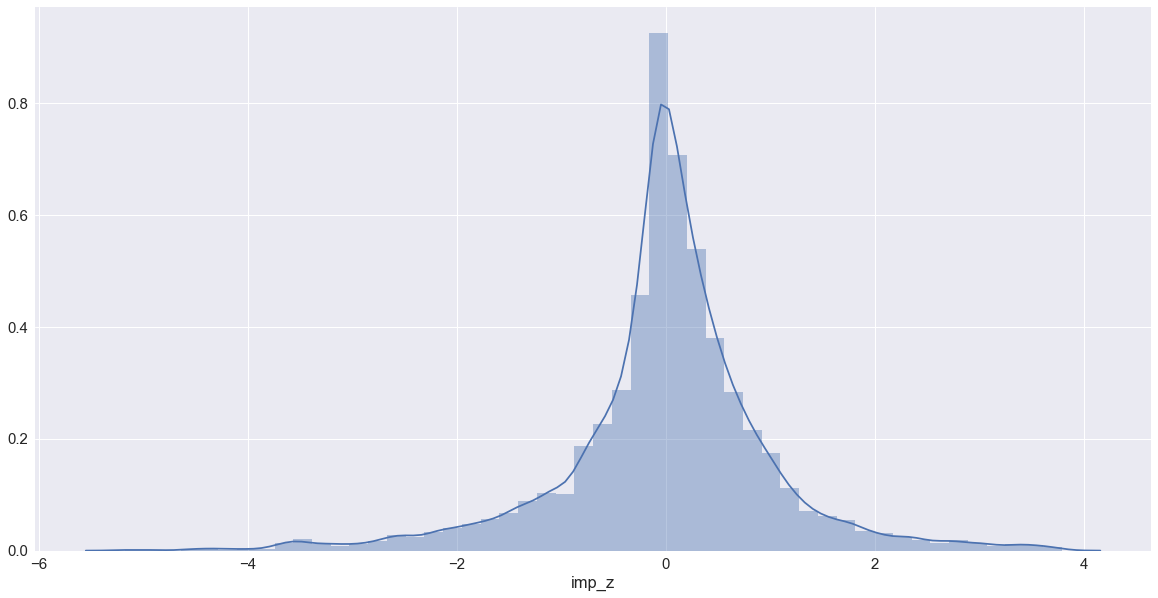

In [50]:
plt.figure(figsize=(20,10))
sns.set(font_scale = 1.5, context = 'notebook')
sns.distplot(df18a.imp_z)

Ranking improvement, quite normally distributed!

#### Just for fun, let's see the top 10 most improved `male` athletes in `Asia`

In [51]:
l_display_a_col = ['Name','Age','Affiliate_name','Country','rank18', 'rank17','improvement', 'imp_z']
df18a.sort_values(by ='improvement', ascending = False)[df18a.Sex=='M'].head(10).loc[:,l_display_a_col]

/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Name,Age,Affiliate_name,Country,rank18,rank17,improvement,imp_z
User_id,,,,,,,,
319745,Keith Stillman,27,Port Tower CrossFit,Japan,2763,151198.0,148435.0,3.784274
57487,Kim Jwa-Nyeon,43,CrossFit LOL,"Korea, Republic of",34873,179933.0,145060.0,3.696482
1363804,Timofey Bakhurinskiy,25,CrossFit Astana,Kazakhstan,3815,148447.0,144632.0,3.685349
733891,Zachary Thibodaux,24,Fight Tonight CrossFit,"Korea, Republic of",13953,155611.0,141658.0,3.607988
967176,Eunwoong Lee,24,CrossFit MATE,"Korea, Republic of",41171,182305.0,141134.0,3.594358
752725,Lee Byeong Su,27,CrossFit Shout,"Korea, Republic of",48961,189840.0,140879.0,3.587724
278578,JiMoo Son,27,CrossFit Limelight,"Korea, Republic of",291,139217.0,138926.0,3.536922
879011,Xingchen Li,30,Attitude CrossFit,China,12561,149311.0,136750.0,3.480319
1097087,Paolo Volpe,30,CrossFit 6221,Indonesia,41938,178364.0,136426.0,3.471891


#### Where are these insane improvement from?
![picture of keith](img/kstillman.jpg "Keith and I at Bangkok Throwdown 2018")
* Injuries?
* New to the sport?
* Actual Improvements?
* Something else?

#### Back to our topic
* let's group the dataframe by `Affiliate_id` again and rank them by `Total_rank_improved`

In [52]:
df18ag = df18a.groupby('Affiliate_id')['improvement'].agg({'athletes_count': 'count', 
                                                           'Total_rank_improved': 'sum', 
                                                           'Avg_rank_improved': 'mean',
                                                           'Median_rank_improved': 'median'})
df18ag['Affiliate_name'] = df18ag.index.map(lambda x: GetAffiliateDet(x, 'Affiliate_name'))
df18ag['Country'] = df18ag.index.map(lambda x: GetAffiliateDet(x, 'Country'))

/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


#### Which gym improved their repeat athletes the most in `Asia`?

In [63]:
l_display_a_col = ['Affiliate_name','Country','athletes_count','Total_rank_improved','Avg_rank_improved','Median_rank_improved']
df18ag.sort_values( by = 'Total_rank_improved', ascending = False).head(10).loc[:, l_display_a_col]

,Affiliate_name,Country,athletes_count,Total_rank_improved,Avg_rank_improved,Median_rank_improved
Affiliate_id,,,,,,
4574,CrossFit EKB,Russian Federation,39,590534.0,15141.897436,9924.0
14574,Actualize CrossFit,Singapore,23,515447.0,22410.739130,13294.0
18507,CrossFit RK Olympicpark,"Korea, Republic of",12,501346.0,41778.833333,30873.0
12640,CrossFit Redyar,Russian Federation,51,443793.0,8701.823529,5486.0
16276,Singa CrossFit,"Korea, Republic of",27,423556.0,15687.259259,17580.0
17256,CrossFit Daikanyama,Japan,16,387475.0,24217.187500,13047.0
13853,CrossFit 4TP,"Korea, Republic of",25,375524.0,15020.960000,9531.0
18581,CrossFit GangDong,"Korea, Republic of",11,370516.0,33683.272727,20964.0
6582,CrossFit Teddygym,"Korea, Republic of",35,366844.0,10481.257143,11125.0


#### Which gym improved their repeat athletes the most in `Asia/Hong Kong`?

In [65]:
df18ag[df18ag.Country == 'Hong Kong'].sort_values( by = 'Total_rank_improved', ascending = False).loc[:,l_display_a_col]

,Affiliate_name,Country,athletes_count,Total_rank_improved,Avg_rank_improved,Median_rank_improved
Affiliate_id,,,,,,
6874,CrossFit CFPT,Hong Kong,41,205201.0,5004.902439,290.0
15287,Lion Rock CrossFit,Hong Kong,6,-11716.0,-1952.666667,8303.0
6960,CrossFit Typhoon,Hong Kong,10,-26480.0,-2648.000000,-4648.5
18157,Reebok CrossFit Asphodel,Hong Kong,22,-77357.0,-3516.227273,-5222.0
11248,CrossFit Cavaliers,Hong Kong,22,-93719.0,-4259.954545,162.5
5725,CrossFit 852,Hong Kong,44,-155654.0,-3537.590909,765.5
17460,CrossFit FPG,Hong Kong,17,-170945.0,-10055.588235,6581.0
15225,CrossFit Quarry Bay,Hong Kong,30,-684962.0,-22832.066667,-4756.0


#### How do those improvement in `Asia/Hong Kong` compare by distribution in a boxplot (to account for outliners)

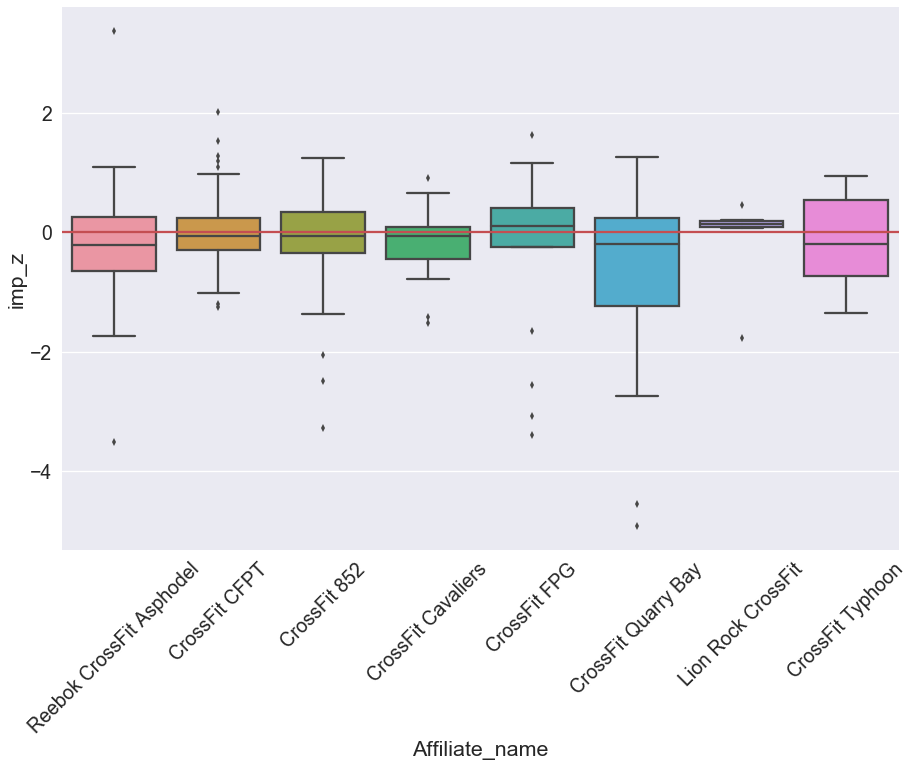

In [69]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.5, context = 'talk')
g = sns.boxplot( data = df18a[ df18a.Country == 'Hong Kong'], 
            x = 'Affiliate_name', y = 'imp_z')
g.set_xticklabels(g.get_xticklabels(), rotation=45)
mean_z = df18a.imp_z.mean()
g.hlines(mean_z, g.get_xlim()[0], g.get_xlim()[1], color = 'r')

#### Are there noticeable improvement differences between Male and Female athletes in `Asia/Hong Kong`?

/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


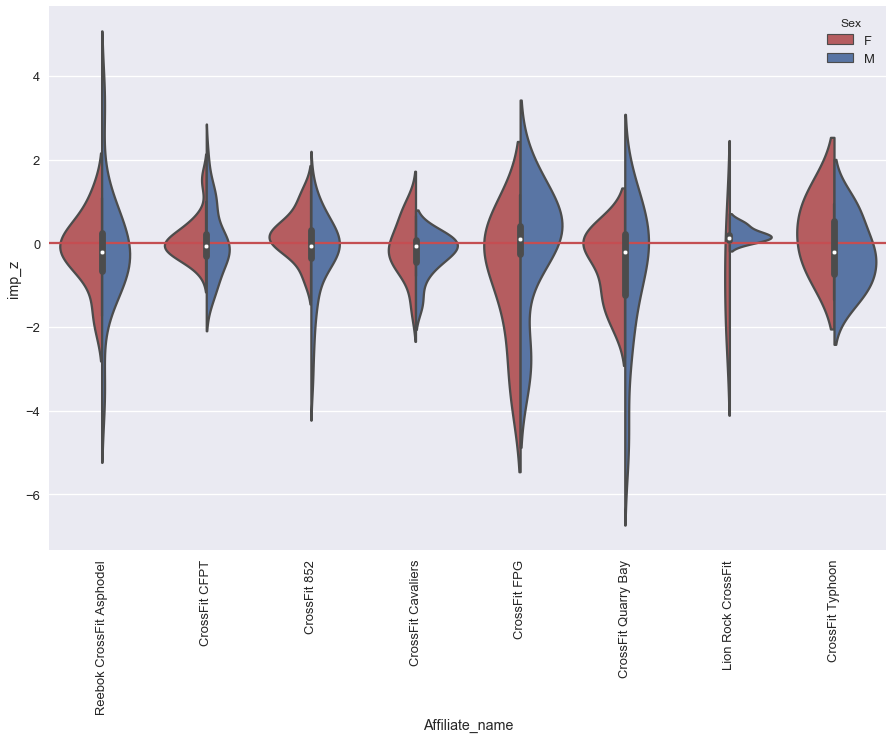

In [73]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 1, context = 'talk')
g = sns.violinplot( data = df18a[ df18a.Country == 'Hong Kong'], 
            x = 'Affiliate_name', y = 'imp_z', hue = 'Sex', split=True,
            palette = ['r','b'])
g.set_xticklabels(g.get_xticklabels(), rotation=90)
mean_z = df18a.imp_z.mean()
g.hlines(mean_z, g.get_xlim()[0], g.get_xlim()[1], color = 'r')

#### Also what's the survivibility of the 'Open Athlete' by gyms in `Asia/Hong Kong`?

In [106]:
def dfGet(in_df, keyCol, inkey, getcol):
    dfilter = in_df[keyCol]== inkey
    if sum(dfilter)==0:
        return np.nan
    else:
        return in_df[dfilter][getcol].values[0]

df18s = df18_
df18s['Athlete_2018_repeat_count'] = df18s.Affiliate_name.apply(lambda x: dfGet(df18ag, 'Affiliate_name',x,'athletes_count'))
df18s['survival_rate'] = df18s['Athlete_2018_repeat_count']/ df18s['Athlete_count_2018']

l_display_a_col = ['Affiliate_name','Country','Athlete_count_2018','Athlete_2018_repeat_count','survival_rate']
df18s[df18s.Country == 'Hong Kong'].sort_values( by = 'survival_rate', ascending = False).loc[:, l_display_a_col]

,Affiliate_name,Country,Athlete_count_2018,Athlete_2018_repeat_count,survival_rate
Affiliate_id,,,,,
5725,CrossFit 852,Hong Kong,59,44.0,0.745763
11248,CrossFit Cavaliers,Hong Kong,32,22.0,0.687500
6874,CrossFit CFPT,Hong Kong,62,41.0,0.661290
18157,Reebok CrossFit Asphodel,Hong Kong,36,22.0,0.611111
15225,CrossFit Quarry Bay,Hong Kong,51,30.0,0.588235
17460,CrossFit FPG,Hong Kong,29,17.0,0.586207
15287,Lion Rock CrossFit,Hong Kong,14,6.0,0.428571
6960,CrossFit Typhoon,Hong Kong,29,10.0,0.344828


Text(0.5,1,'Open Athlete Survival Rate')

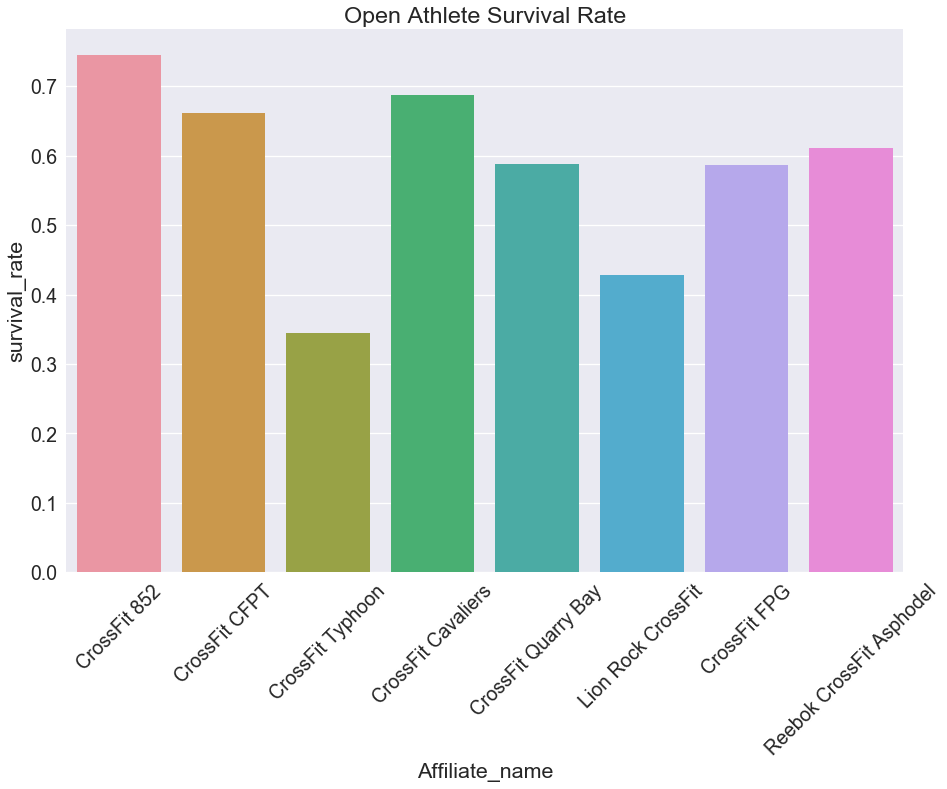

In [115]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.5, context = 'talk')
g = sns.barplot( data = df18s[ df18s.Country == 'Hong Kong'], 
            x = 'Affiliate_name', y = 'survival_rate')
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.set_title('Open Athlete Survival Rate')

## What does this all mean?
* Keep at it! Repeat athletes found 1% global ranking improvement on average! And [one percent](https://jamesclear.com/marginal-gains) goes a long way!

* With this analysis, we can help someone identify where's a good gym to join if they are visiting or moving to a new city (maybe even write a Plot.ly interactive web app??)

### What's Next?
Using the same dataset we will answer
* which country to move to if you want to become a [2019 Crossfit Game](https://morningchalkup.com/2018/08/23/how-greg-glassman-is-reshaping-the-crossfit-games/) athlete? Taking into account the competitiveness of the country, quality of life, and coaching jobs available.
* Analyze performance by Weight Class! To answer the question, what if Crossfit have weight categories?